# Assignment 3
---
### Information
* Julian Boaz
* Assignment 3
* Due Date: 11/14/2021
---
# EDA

In [1]:
# Importing libraries for EDA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf

# Creating dataframes for training and testing data
trainData = pd.read_csv('../input/assignment3data/train.csv')
evalData = pd.read_csv('../input/assignment3data/eval.csv')

# Looking for missing values
print('Missing data in training data: ', trainData.isnull().sum())
print('\n')
print('Missing data in the evaluation set: ', evalData.isnull().sum())

Missing data in training data:  id            0
0             0
1             0
2             0
3             0
             ..
1272          0
1273          0
1274          0
pubchem_id    0
Eat           0
Length: 1278, dtype: int64


Missing data in the evaluation set:  id            0
0             0
1             0
2             0
3             0
             ..
1271          0
1272          0
1273          0
1274          0
pubchem_id    0
Length: 1277, dtype: int64


Well, there's no missing values. So usually what I would do next is make boxplots for every column to check for outliers, however, there's 1277 columns which is way too many boxplots to look at, so I think I'll attempt to find out if there's a pattern to these values.

In [2]:
for x in trainData:
    if (len(trainData[x].unique()) < 6):
        print(x)
        print(trainData[x].unique())

0
[ 73.51669472 388.02344103  53.3587074   36.8581052  332.34490564]
609
[ 0.          0.5        36.8581052  53.3587074  73.51669472]
645
[ 0.          0.5        36.8581052  73.51669472 53.3587074 ]
680
[ 0.          0.5        36.8581052  53.3587074  73.51669472]
714
[ 0.          0.5        36.8581052  53.3587074  73.51669472]
747
[ 0.          0.5        36.8581052  53.3587074  73.51669472]
779
[ 0.          0.5        36.8581052  53.3587074  73.51669472]
810
[ 0.          0.5        36.8581052  53.3587074  73.51669472]
840
[ 0.          0.5        36.8581052  53.3587074  73.51669472]
869
[ 0.          0.5        36.8581052  53.3587074  73.51669472]
897
[ 0.          0.5        36.8581052  53.3587074  73.51669472]
924
[ 0.         0.5       36.8581052]
950
[ 0.         0.5       36.8581052]
975
[ 0.         0.5       36.8581052]
999
[ 0.         0.5       36.8581052]
1022
[ 0.         0.5       36.8581052]
1044
[ 0.         0.5       36.8581052]
1065
[ 0.         0.5       36.8581

So this is quite interesting. There's a couple of columns with a very low amount of unique values, however, I don't know what these values actually mean, so I cannot determine whether I should change these values in order to create some sort of ordinal structure. It could be possible that a extremely high value and extremely low value could result in an Eat value that is the same, and some value in that column that falls in the middle produces a different value. So it would likely not help for me to change this to an ordinal structure. Now what do these *Eat* values even mean? It's not quite clear from the documentation, so I should do a little research on it.

Unique values in eat:  12959


<AxesSubplot:>

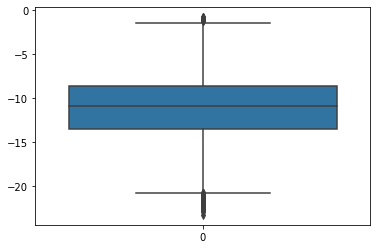

In [3]:
# Unique Values in eat
print('Unique values in eat: ', len(trainData['Eat'].unique()))

# Looking for outliers
sns.boxplot(data=trainData['Eat'])

So it looks like the target vector only contains negative values, it also has a lot of unique values, which likely means that there will be a lot of columns that are important features. The outliers on the boxplot are still likely to be important information that I cannot simply get rid of, but I will look into how many there are go from there.

In [4]:
print('Amount of data where Eat > -3: ', len(trainData.loc[trainData['Eat'] > -3]))
print('Amount of observations where Eat is < -20: ', len(trainData.loc[trainData['Eat'] < -22]))

Amount of data where Eat > -3:  70
Amount of observations where Eat is < -20:  21


I'm not sure whether I should drop these values because realistically, these could provide me with some quality information. It's relatively hard to do EDA on a dataset with so many columns, but perhaps there's a few cheeky things I could try.

#### Note about my EDA
After messing with the first two models, I quickly realized there was more I needed to do with thee data. Since I couldn't figure out exactly what feature was what or even which was the most important, I decided to standardize the data, which *destroyed* my score, in which I decided to just normalize the input, and the helped quite a bit. So later in this notebook you will see me using `tf.keras.layers.Normalization()` and implementing that as my first layer in that model.

---
# Building Models

Given the information above, I will build some models just to see what I can get away with here. I can't quite understand what is going on with the data, however, if a model that includes almost all the columns as features performs well, that could give show me whether or not there's some features that are non-helpful

In [5]:
# Getting rid of the Eat column in the training set
X = trainData.drop(['Eat'], axis=1)
y = trainData['Eat']

model1scores = pd.DataFrame()
model2scores = pd.DataFrame()
model3scores = pd.DataFrame()

    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # I can also mess with the test split if my model overfits perhaps, however it's more likely I'm using too many features if it overfits, but we shall see




# trying to scale data
#X_train = preprocessing.scale(X_train)
#X_test = preprocessing.scale(X_test)


I called `train_test_split()` here in order to get a shape for the X_train input

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Creating Sequential model object
model1 = Sequential()

# Creating layers to the NN using Dense
model1.add(Dense(512, input_shape = X_train.shape, activation = 'relu'))
model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(64, activation = 'relu'))
#model.add(Dense(256, activation = 'relu'))
model1.add(Dense(1, activation = 'linear'))

2021-11-14 23:16:45.578815: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-14 23:16:45.668764: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-14 23:16:45.669581: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-14 23:16:45.670778: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [7]:
# Compiling model
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')
earlyStop = EarlyStopping(monitor='val_loss', patience = 30)

In [8]:
# Fitting model, hopefully it doesn't take too long!!!!
history = model1.fit(X_train, y_train, epochs=512, validation_data=(X_test, y_test), callbacks = [earlyStop])

2021-11-14 23:16:48.213440: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/512
285/285 [==============================] - 3s 6ms/step - loss: 41711.9961 - val_loss: 7.4633
Epoch 2/512
285/285 [==============================] - 1s 3ms/step - loss: 8.6904 - val_loss: 8.9400
Epoch 3/512
285/285 [==============================] - 1s 3ms/step - loss: 6.7273 - val_loss: 6.0457
Epoch 4/512
285/285 [==============================] - 1s 3ms/step - loss: 5.6817 - val_loss: 7.7206
Epoch 5/512
285/285 [==============================] - 1s 3ms/step - loss: 9.6731 - val_loss: 5.5577
Epoch 6/512
285/285 [==============================] - 1s 3ms/step - loss: 64.8558 - val_loss: 121.4743
Epoch 7/512
285/285 [==============================] - 1s 3ms/step - loss: 1472.7886 - val_loss: 7104.7466
Epoch 8/512
285/285 [==============================] - 1s 3ms/step - loss: 170.2422 - val_loss: 6.4366
Epoch 9/512
285/285 [==============================] - 1s 3ms/step - loss: 5.8252 - val_loss: 4.8171
Epoch 10/512
285/285 [==============================] - 1s 3ms/step - loss: 

In [9]:
# Going to use a nifty little plotting function from DataCamp (Deep learning with Keras in python) in order to visualize whats going on
def plot_loss(loss, val_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Loss of Model')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

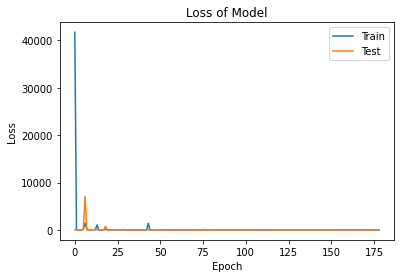

In [10]:
# plotting loss
plot_loss(history.history['loss'], history.history['val_loss'])

In [11]:
# looking at mse
mse = model1.evaluate(X_test, y_test, verbose = 0)
print((mse)**(1/2))

3.681894082165808


---
## Model 2


In [12]:
# Creating Sequential model object
model2 = Sequential()

# Creating layers to the NN using Dense
model2.add(Dense(64, input_shape = X_train.shape, activation = 'relu'))
model2.add(Dense(128, activation = 'relu'))
model2.add(Dense(256, activation = 'relu'))
model2.add(Dense(1024, activation = 'relu'))
#model2.add(Dense(512, activation = 'relu'))
#model.add(Dense(256, activation = 'relu'))
model2.add(Dense(1, activation = 'linear'))

In [13]:
# Compiling model
checkpoint = ModelCheckpoint('best_model.h5', monitor = 'val_loss', save_best_only = True)
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [14]:
history2 = model2.fit(X_train, y_train, epochs=512, validation_data=(X_test, y_test), callbacks = [earlyStop,checkpoint])

Epoch 1/512
285/285 [==============================] - 1s 4ms/step - loss: 6235.9443 - val_loss: 13.3457
Epoch 2/512
285/285 [==============================] - 1s 3ms/step - loss: 7.9735 - val_loss: 11.8427
Epoch 3/512
285/285 [==============================] - 1s 3ms/step - loss: 5.4520 - val_loss: 5.2727
Epoch 4/512
285/285 [==============================] - 1s 3ms/step - loss: 5.4905 - val_loss: 6.8183
Epoch 5/512
285/285 [==============================] - 1s 3ms/step - loss: 4.5540 - val_loss: 5.4378
Epoch 6/512
285/285 [==============================] - 1s 3ms/step - loss: 7.5467 - val_loss: 9.0048
Epoch 7/512
285/285 [==============================] - 1s 3ms/step - loss: 4.1456 - val_loss: 10.9893
Epoch 8/512
285/285 [==============================] - 1s 4ms/step - loss: 3.4269 - val_loss: 3.0741
Epoch 9/512
285/285 [==============================] - 1s 3ms/step - loss: 3.1901 - val_loss: 6.7876
Epoch 10/512
285/285 [==============================] - 1s 3ms/step - loss: 3.7792 - 

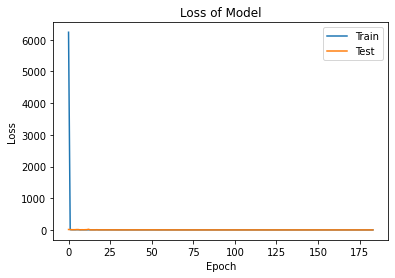

0.3251812676956667


In [15]:
plot_loss(history2.history['loss'], history2.history['val_loss'])

# looking at mse
mse2 = model2.evaluate(X_test, y_test, verbose = 0)
print((mse2)**(1/2))

---
## Model 3

In [16]:
from keras.metrics import RootMeanSquaredError
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [17]:
def build_model(hp):
    model = Sequential()
    
    model.add(Dense(hp.Int("input_units", 64, 2048, 256), input_shape = X_train.shape, activation = 'relu'))
    for x in range(hp.Int("num_layers", 1,2)):
        model.add(Dense(hp.Int("hidden_units", 2048, 4096, step=512), activation = hp.Choice("activation", values=['relu','elu'])))
    
    model.add(Dense(1, activation = 'linear'))
    
    model.compile(optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4, 1e-5])), loss = 'mean_squared_error', metrics=[RootMeanSquaredError()])
    
    return model

In [18]:
#tuner = RandomSearch(build_model, objective = 'val_loss', max_trials = 100, executions_per_trial = 1)
#tuner.search(X_train, y_train, epochs = 200, validation_data = (X_test, y_test))
#best_model = tuner.get_best_models()[0]

I'm going to quickly explain what's going on here so I don't confuse anyone. I was using a Random Search with Keras Tuner in order to attempt to find a better model, however for saving the output I'm going to not keep the keras tuner in the notebook, as it simply takes too many hours for me to work on the project and save it. However, what I've found so far is that a higher amount of layers AND neurons helped dramatically, as well as normalizing the data. Normalizing the data gave me a **huge** boost in performance. I even found that the `adamax` optimizer helped tremedously for my case, even though I'm not 100% familiar with the math behind it.

In [19]:
# Creating Sequential model object
normal = tf.keras.layers.Normalization()
normal.adapt(np.array(X_train))

model3 = Sequential()

# Creating layers to the NN using Dense
model3.add(normal)
#model3.add(Dense(1024, input_shape = X_train.shape, activation = 'relu'))
model3.add(Dense(512, activation = 'relu'))
model3.add(Dense(1024, activation = 'relu'))
model3.add(Dense(2048, activation = 'relu'))
model3.add(Dense(4096, activation = 'relu'))
model3.add(Dense(4096, activation = 'relu'))






model3.add(Dense(1, activation = 'linear'))

# Compiling model


model3.compile(optimizer = 'adamax', loss = 'mean_squared_error', metrics=[RootMeanSquaredError()])
earlyStop3 = EarlyStopping(monitor='val_loss', patience = 150)

In [20]:
history3 = model3.fit(X_train, y_train, epochs=1024, validation_data=(X_test, y_test), callbacks = [checkpoint])

Epoch 1/1024
285/285 [==============================] - 3s 8ms/step - loss: 13.4943 - root_mean_squared_error: 3.6735 - val_loss: 1.8620 - val_root_mean_squared_error: 1.3646
Epoch 2/1024
285/285 [==============================] - 2s 7ms/step - loss: 0.8064 - root_mean_squared_error: 0.8980 - val_loss: 0.4262 - val_root_mean_squared_error: 0.6528
Epoch 3/1024
285/285 [==============================] - 2s 7ms/step - loss: 0.3074 - root_mean_squared_error: 0.5545 - val_loss: 0.2602 - val_root_mean_squared_error: 0.5101
Epoch 4/1024
285/285 [==============================] - 2s 7ms/step - loss: 0.2059 - root_mean_squared_error: 0.4538 - val_loss: 0.1839 - val_root_mean_squared_error: 0.4288
Epoch 5/1024
285/285 [==============================] - 2s 7ms/step - loss: 0.2545 - root_mean_squared_error: 0.5044 - val_loss: 0.2316 - val_root_mean_squared_error: 0.4812
Epoch 6/1024
285/285 [==============================] - 2s 7ms/step - loss: 0.2269 - root_mean_squared_error: 0.4763 - val_loss: 

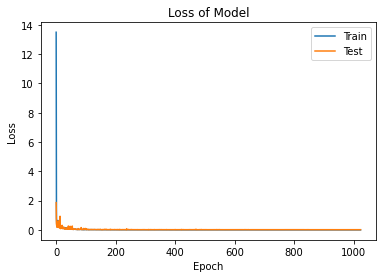

[0.015057050622999668, 0.12270717322826385]


In [21]:
#plot_loss(history3.history['loss'], history3.history['val_loss'])
model3.load_weights('./best_model.h5')
plot_loss(history3.history['loss'], history3.history['val_loss'])
# looking at mse
model3.load_weights('./best_model.h5')
mse3 = model3.evaluate(X_test, y_test, verbose = 0)
print((mse3))



After doing a lot of hyperparameter tuning, I discovered a few things. One, I needed to do some preprocessing to get my model to perform better. Another thing was that I was not using enough neurons, and increasing the number of neurons per layer seemed to help quite a lot. However, this biggest thing that helped would be using `tf.keras.layers.Normalization()` and using that as the first layer, this boosted my position on the leaderboard by literally 60 positions. Another thing was using callbacks. Using `modelCheckpoint()` helped increase my score quite a lot, I suppose because I wasn't actually using the best model from every training session. 

So yes score did have quite an impact on why I chose this model, but also I learned the most by training this one. I figured out a bunch of tips and tricks in order to help me get the best score possible. I figured out callbacks earlier in the session, but training this model made me realize I needed to normalize the data which gave me the biggest performance increase. Then it was just messing with layers, neurons, and optimizers in order to turn this into a successful model.

---
# Submission

In [22]:
# creating a test submission
#model1Evaluation = model.predict(evalData, verbose = 0)
#model1Evaluation = np.squeeze(model1Evaluation, axis = 1)

#model2Eval = model2.predict(evalData, verbose = 0)
#model2Eval = np.squeeze(model2Eval, axis = 1)

model3Eval = model3.predict(evalData, verbose = 0)
model3Eval = np.squeeze(model3Eval, axis = 1)

output = pd.DataFrame({
    'id': evalData['id'],
    'Eat': model3Eval
})


output.to_csv('submission.csv', index=False)
print(output.to_string())


        id        Eat
0        0 -10.382427
1        1 -13.273181
2        2 -16.758354
3        3 -12.619201
4        4  -8.917224
5        5 -19.911539
6        6  -5.236039
7        7 -11.801851
8        8  -9.250232
9        9 -16.854837
10      10 -18.716106
11      11 -19.809511
12      12 -10.262102
13      13 -11.298639
14      14 -11.205124
15      15  -9.152442
16      16 -12.658139
17      17  -5.113077
18      18  -9.534296
19      19  -5.897766
20      20 -13.955994
21      21  -5.710938
22      22  -2.835899
23      23  -5.627174
24      24  -7.905924
25      25 -10.760029
26      26 -17.712782
27      27 -14.200308
28      28 -14.563016
29      29 -14.993731
30      30  -7.978818
31      31  -0.855173
32      32 -11.448354
33      33 -11.891036
34      34 -15.702291
35      35  -7.491420
36      36  -9.352856
37      37 -13.974740
38      38  -9.763896
39      39 -13.511970
40      40 -14.893514
41      41 -12.918074
42      42  -8.252492
43      43  -9.671045
44      44